# News Mood via Twitter

#Observations:
    
The latest overall sentiment from the news sources analyzing the last 100 tweets is negative except from CNN.
    
BBC which had a greater negative sentiment compared to the other also had more tweets discussing broad international news.
    
Although the latest Fox News tweets mainly centered around POTUS Trump, it's negative sentiment was low. It may correspond to the latest bump in his approval ratings.

In [19]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_terms = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding values 
source = []
tweet_times = []
tweet_text = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through all target users
for target in target_terms:
    
      # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            
            source.append(target)
            raw_time = tweet["created_at"]
            tweet_times.append(raw_time)
                
            txt = tweet["text"]
            tweet_text.append(txt)
           
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)



In [17]:
#create dataframe of all values
tweet_df = pd.DataFrame({'Source':source,'Time':tweet_times,'Tweet Text':tweet_text,'Compound':compound_list,
                         'Positive':positive_list,'Neutral':neutral_list,'Negative':negative_list})
tweet_df = tweet_df[['Source','Compound','Negative','Neutral','Positive','Time','Tweet Text']]

# Save data to csv
tweet_df.to_csv("NewsTweet Sentiment.csv")
tweet_df.head()

,Source,Compound,Negative,Neutral,Positive,Time,Tweet Text
0,@BBC,0.0000,0.000,1.000,0.000,Mon Apr 02 13:10:30 +0000 2018,RT @corpodelledonne: La @BBC applicherà il 50/...
1,@BBC,-0.3182,0.173,0.726,0.101,Mon Apr 02 13:10:16 +0000 2018,"RT @PhyllisMufson: ""Picked the wrong career?"" ..."
2,@BBC,0.0000,0.000,1.000,0.000,Mon Apr 02 13:10:15 +0000 2018,@censorsapproved That’s asking a bit much. Thi...
3,@BBC,0.1477,0.119,0.740,0.141,Mon Apr 02 13:10:14 +0000 2018,RT @needsfixingnow: @RCorbettMEP Wow British m...
4,@BBC,0.0000,0.000,1.000,0.000,Mon Apr 02 13:10:14 +0000 2018,@drkerem @Noor_and_Alaa @RedCrescentTR @UNReli...


In [7]:
tweet_df['Source'].value_counts()

@BBC        100
@CBSNews    100
@FoxNews    100
@CNN        100
@nytimes    100
Name: Source, dtype: int64

In [8]:
bbc = tweet_df.query('Source == "@BBC"')
bbcx = pd.Series(np.arange(bbc['Compound'].count(), 0, -1))
bbcy = np.array(bbc['Compound'])

cbs = tweet_df.query('Source == "@CBSNews"')
cbsx = pd.Series(np.arange(cbs['Compound'].count(), 0, -1))
cbsy = np.array(cbs['Compound'])

fox = tweet_df.query('Source == "@FoxNews"')
foxx = pd.Series(np.arange(fox['Compound'].count(), 0, -1))
foxy = np.array(fox['Compound'])

cnn = tweet_df.query('Source == "@CNN"')
cnnx = pd.Series(np.arange(cnn['Compound'].count(), 0, -1))
cnny = np.array(cnn['Compound'])

nyt = tweet_df.query('Source == "@nytimes"')
nytx = pd.Series(np.arange(nyt['Compound'].count(), 0, -1))
nyty = np.array(nyt['Compound'])

In [ ]:
#formatted today's date for charts
tdate = dt.datetime.today().strftime("%m/%d/%Y")

# Sentiment Analysis Scatter Plot

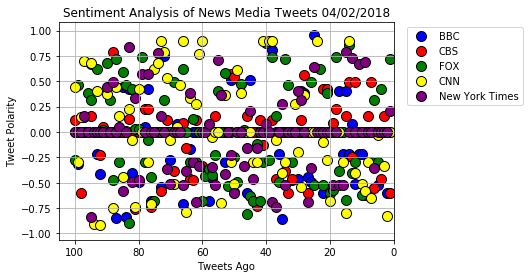

In [26]:
bbcp = plt.scatter(bbcx, bbcy, s=100, c='blue', edgecolors="black", label='BBC')
cbsp = plt.scatter(cbsx, cbsy, s=100, c='red', edgecolors="black", label='CBS')
foxp = plt.scatter(foxx, foxy, s=100, c='green', edgecolors="black", label='FOX')
cnnp = plt.scatter(cnnx, cnny, s=100, c='yellow', edgecolors="black", label='CNN')
nytp = plt.scatter(nytx, nyty, s=100, c='purple', edgecolors="black", label='New York Times')

plt.title("Sentiment Analysis of News Media Tweets " + str(tdate))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim([105,0])
plt.grid(True)
plt.legend(handles=[bbcp,cbsp,foxp,cnnp,nytp], loc="right", bbox_to_anchor=(1.4, 0.8))
plt.savefig("News Sentiment Plot.png")
plt.show()

In [36]:
newsorg = ["BBC", "CBS", "FOX", "CNN", "New York Times"]
cmdavg = [np.mean(bbcy),np.mean(cbsy),np.mean(foxy),np.mean(cnny),np.mean(nyty)]
x_axis = np.arange(len(cmdavg))

# Overall Media Sentiment Bar Plot

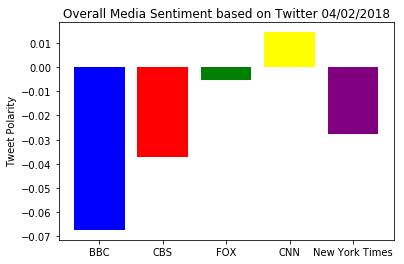

In [39]:
colors = ["blue","red","green","yellow","purple"]
plt.bar(x_axis, cmdavg,color=colors, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, newsorg)

plt.title("Overall Media Sentiment based on Twitter " + str(tdate))
plt.ylabel("Tweet Polarity")
plt.savefig("News Twitter Sentiment.png")
plt.show()